
## 4. Handling Outliers in the Boston Housing Dataset
### <b>Task:</b> Identify and handle outliers in the Boston Housing dataset using techniques like Z-score, IQR, and visualization methods.

In [207]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Loading the dataset
boston_dataset = pd.read_csv('Datasets\\BostonHousing.csv')
print(boston_dataset.shape, '\n')
boston_dataset.head()

(506, 14) 



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [209]:
# Checking for the missing values
boston_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

-> So, there are no missing values in the dataset. We can now proceed to identify and handle outliers.

## <li>Analyzing Distributuion of each Feature</li>

<p> Since <b>'medv'</b> is the target variable, we have to look in the other features whether they are outliers or not.</p>

<p> Creating a distribution kde plot to visualize which technique will be suitable for which feature. The key is:
<ul>
    <li>Normal Distributions  -> Z scores</li>
    <li>Skewed Distributions  -> IQR</li> 
    <li>Irregular Distributions -> Winsorization</li>
</ul>
</p>

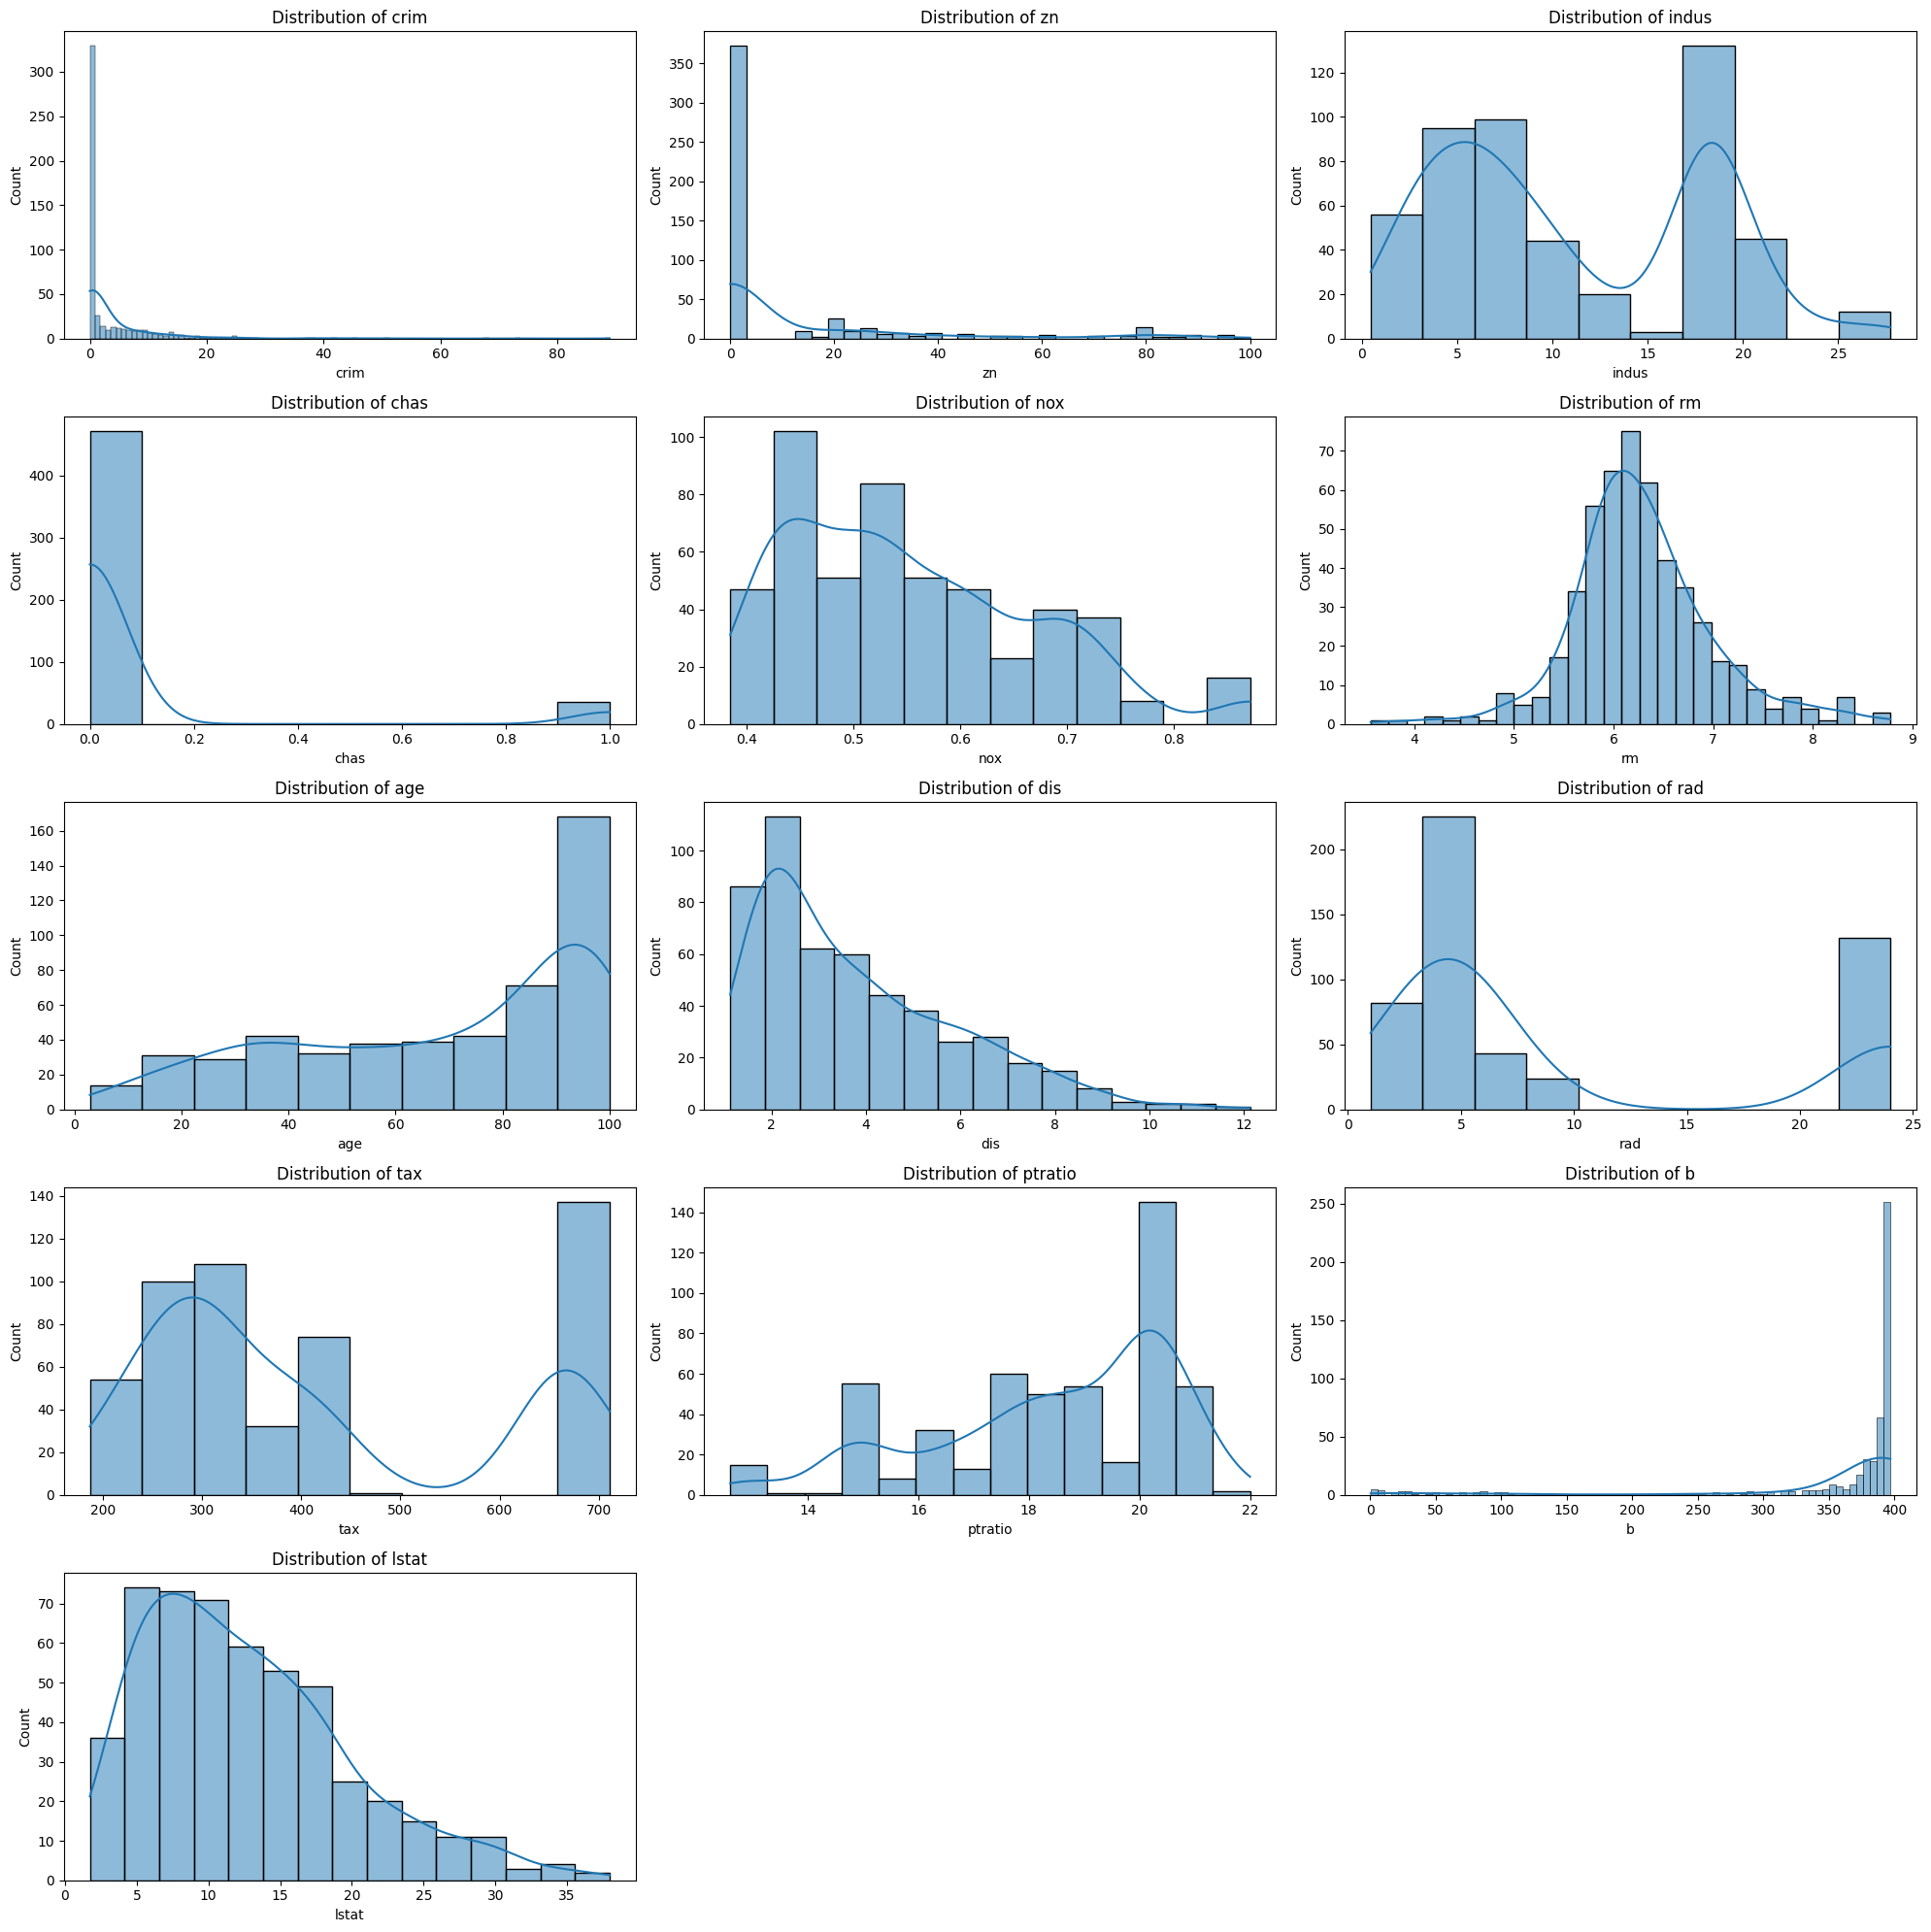

In [210]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(boston_dataset.columns[:-1]):
    sns.histplot(boston_dataset[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<p>So we can see from the above graph:</p>
<p><ul>
    <li>Only <b>rm</b> has normal distribution. So, only this one feature will be handled by z scores techniques.</li>
    <li>The <b>age</b>, <b>dis</b>, <b>ptratio</b> and <b>lstat</b> features have skewed distributions. So, these are good candidates for IQR method.</li>
    <li>Remaining features, <b>crim</b>, <b>zn</b>, <b>indus</b>, <b>chas</b>, <b>nox</b>, <b>rad</b>, <b>tax</b> and <b>b</b> have irregular distributions and their outliers will be handled by winsorization/IQR technique.</li>
</ul></p>

## <li>Z Scores Method</li>

In [211]:
# Calculating mean, std, max and min value of 'rm'
print('Mean value of rm:', boston_dataset['rm'].mean())
print('Std value of rm:', boston_dataset['rm'].std())
print('Minimum value of rm:', boston_dataset['rm'].min())
print('Maximum value of rm:', boston_dataset['rm'].max())

Mean value of rm: 6.284634387351779
Std value of rm: 0.7026171434153233
Minimum value of rm: 3.561
Maximum value of rm: 8.78


In [212]:
# Finding the boundary values
upper_limit = boston_dataset['rm'].mean() + 3*boston_dataset['rm'].std()   # Mean + 3 std
print('Highest Allowed:', upper_limit)

lower_limit = boston_dataset['rm'].mean() - 3*boston_dataset['rm'].std()   # Mean - 3 std
print('Lowest Allowed:', lower_limit)

Highest Allowed: 8.392485817597748
Lowest Allowed: 4.176782957105809


-> Higher and lower limit defines the range outside which every value is considered as outlier.

In [213]:
# Finding outliers: Showing only those values which are beyond the limits
boston_dataset[(boston_dataset['rm']>upper_limit) | (boston_dataset['rm']<lower_limit)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
262,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
364,3.47428,0.0,18.10,1,0.718,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
406,20.71620,0.0,18.10,0,0.659,4.138,100.0,1.1781,24,666,20.2,370.22,23.34,11.9


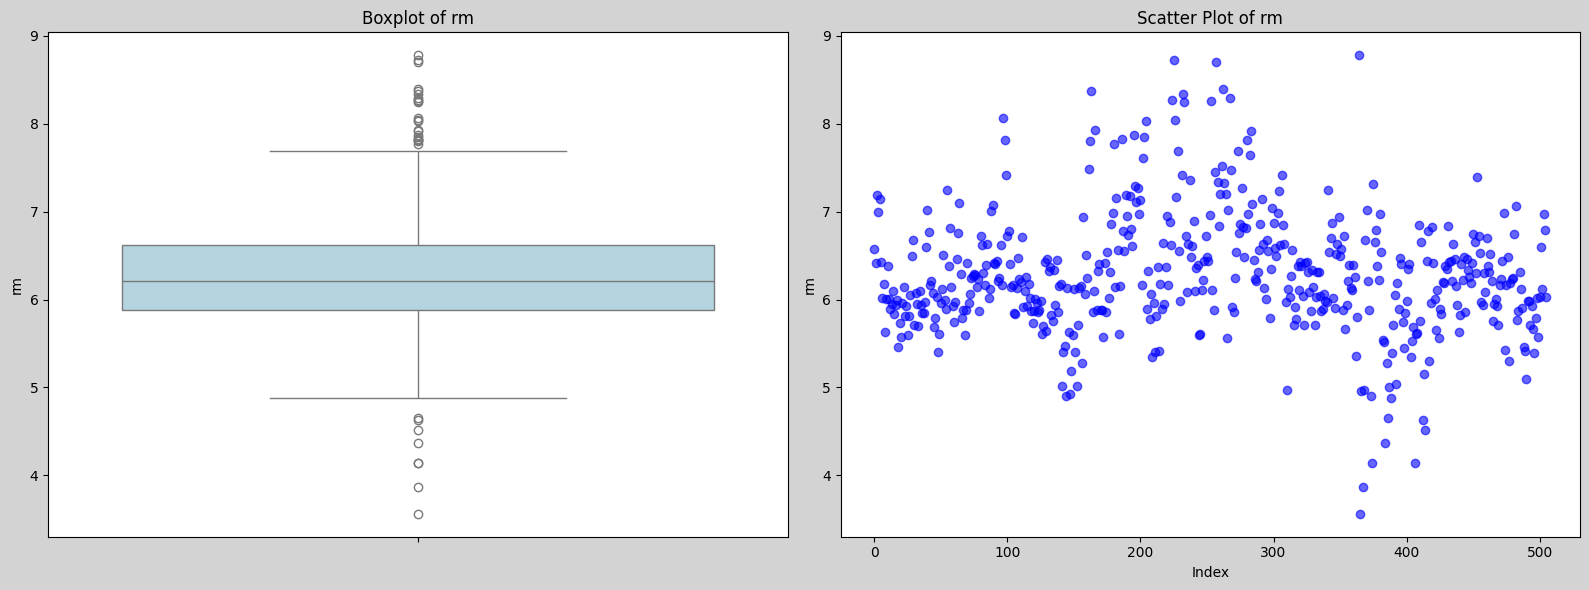

In [214]:
# To see the outliers visually
plt.figure(figsize=(16,6), facecolor='lightgray')
plt.subplot(1, 2, 1)
sns.boxplot(boston_dataset['rm'], color='lightblue')
plt.title('Boxplot of rm')

plt.subplot(1, 2, 2)
plt.scatter(x=range(len(boston_dataset['rm'])), y=boston_dataset['rm'], color='blue', alpha=0.6)
plt.title('Scatter Plot of rm')
plt.xlabel('Index')
plt.ylabel('rm')

plt.tight_layout()
plt.show()

-> So by both graphically and by data, it can be seen that rm feature has outliers (8 to be exact).

### Handling the Outliers

#### <li>Trimming the Outliers</li>
<pre>       Dropping the rows in which outliers exists.</pre>

In [215]:
# Trimming the outliers in the dataset: Removing those rows in which rm has value exceeding from the limit
trimmed_dataset = boston_dataset[(boston_dataset['rm']<=upper_limit) & (boston_dataset['rm']>=lower_limit)]
trimmed_dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


-> Hence, the outliers have been handled by removing them from the dataset.

In [216]:
# Alternative approch
# Calculating the z scores
boston_dataset['rm_zscores'] = (boston_dataset['rm'] - boston_dataset['rm'].mean())/boston_dataset['rm'].std()   # Using formula to calculate z scores
boston_dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,rm_zscores
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.413263
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.194082
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.281446
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.015298
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.227362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0.438881
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,-0.234316
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0.983986
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0.724955


In [217]:
# Trimming using z scores: We will remove those values from the set which have z score above 3 and below -3 (outliers)
trimmed_zscores_dataset = boston_dataset[(boston_dataset['rm_zscores'] <= 3) & (boston_dataset['rm_zscores'] >= -3)]
trimmed_zscores_dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,rm_zscores
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.413263
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.194082
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.281446
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.015298
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.227362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0.438881
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,-0.234316
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0.983986
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0.724955


-> Hence, the outliers have been handled by removing them from the dataset. Both the methods are same.

### <li>Capping the Outliers</li>
<pre>   Replacing the outliers by upper and lower limit without dropping them.</pre>

In [218]:
# Capping the outliers: Replacing them by the limits
capped_dataset = boston_dataset.copy()

capped_dataset['rm'] = np.where(
    boston_dataset['rm'] > upper_limit,        # Condition 1
    upper_limit,                               # If condition 1 is true
    np.where(                                  # If condition 1 is false
        boston_dataset['rm'] < lower_limit,    # Condition 2
        lower_limit,                           # If condition 2 is true
        boston_dataset['rm']                   # If condition 2 is false
    )
)

In [219]:
print(capped_dataset.shape)

(506, 15)


In [220]:
capped_dataset['rm'].describe()

count    506.000000
mean       6.284575
std        0.689163
min        4.176783
25%        5.885500
50%        6.208500
75%        6.623500
max        8.392486
Name: rm, dtype: float64

-> The number of rows remains the same as well as the rm values also now in the limit (max < upperlimit) and (min > lowerlimit). So the outliers in the 'rm' feature have been handled by using z scores technique.

## <li>IQR Method</li>

In [221]:
# Creating a new dataset having only those rows on which IQR method can be applied, having skewed distributions.
skewed_dataset = boston_dataset[['age', 'dis', 'ptratio', 'lstat']]
print(skewed_dataset.shape, '\n')
skewed_dataset.head()

(506, 4) 



,age,dis,ptratio,lstat
0,65.2,4.0900,15.3,4.98
1,78.9,4.9671,17.8,9.14
2,61.1,4.9671,17.8,4.03
3,45.8,6.0622,18.7,2.94
4,54.2,6.0622,18.7,5.33


In [222]:
skewed_dataset.describe()

,age,dis,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000
mean,68.574901,3.795043,18.455534,12.653063
std,28.148861,2.105710,2.164946,7.141062
min,2.900000,1.129600,12.600000,1.730000
25%,45.025000,2.100175,17.400000,6.950000
50%,77.500000,3.207450,19.050000,11.360000
75%,94.075000,5.188425,20.200000,16.955000
max,100.000000,12.126500,22.000000,37.970000


In [223]:
# We'll handle the outliers of these features one by one. First finding the Q1, Q3, IQR, upper and lower limit for the skewed dataset.
Q1 = skewed_dataset.quantile(0.25)
Q3 = skewed_dataset.quantile(0.75)

# Finding the inter quartile range
IQR = Q3 - Q1
print('IQR:', IQR, '\n')

# Finding the upper and lower limits
upper_limit = Q3 + 1.5*IQR
print('Upper Limit:', upper_limit, '\n')

lower_limit = Q1 - 1.5*IQR
print('Lower Limit:', lower_limit)


IQR: age        49.05000
dis         3.08825
ptratio     2.80000
lstat      10.00500
dtype: float64 

Upper Limit: age        167.6500
dis          9.8208
ptratio     24.4000
lstat       31.9625
dtype: float64 

Lower Limit: age       -28.5500
dis        -2.5322
ptratio    13.2000
lstat      -8.0575
dtype: float64


-> Higher and lower limit defines the range outside which every value is considered as outlier.

In [224]:
# Identifying outliers for each column and storing them in a dictionary
outliers_dict = {}
for column in skewed_dataset.columns:
    outliers = skewed_dataset[(skewed_dataset[column] > upper_limit[column]) | (skewed_dataset[column] < lower_limit[column])]
    outliers_dict[column] = outliers[column]
    if outliers.empty:
        outliers_dict[column] = 'NaN'

# Printing the outliers for each column where outliers exist
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")

Outliers in age:
NaN


Outliers in dis:
351    10.7103
352    10.7103
353    12.1265
354    10.5857
355    10.5857
Name: dis, dtype: float64


Outliers in ptratio:
196    12.6
197    12.6
198    12.6
257    13.0
258    13.0
259    13.0
260    13.0
261    13.0
262    13.0
263    13.0
264    13.0
265    13.0
266    13.0
267    13.0
268    13.0
Name: ptratio, dtype: float64


Outliers in lstat:
141    34.41
373    34.77
374    37.97
387    31.99
412    34.37
414    36.98
438    34.02
Name: lstat, dtype: float64




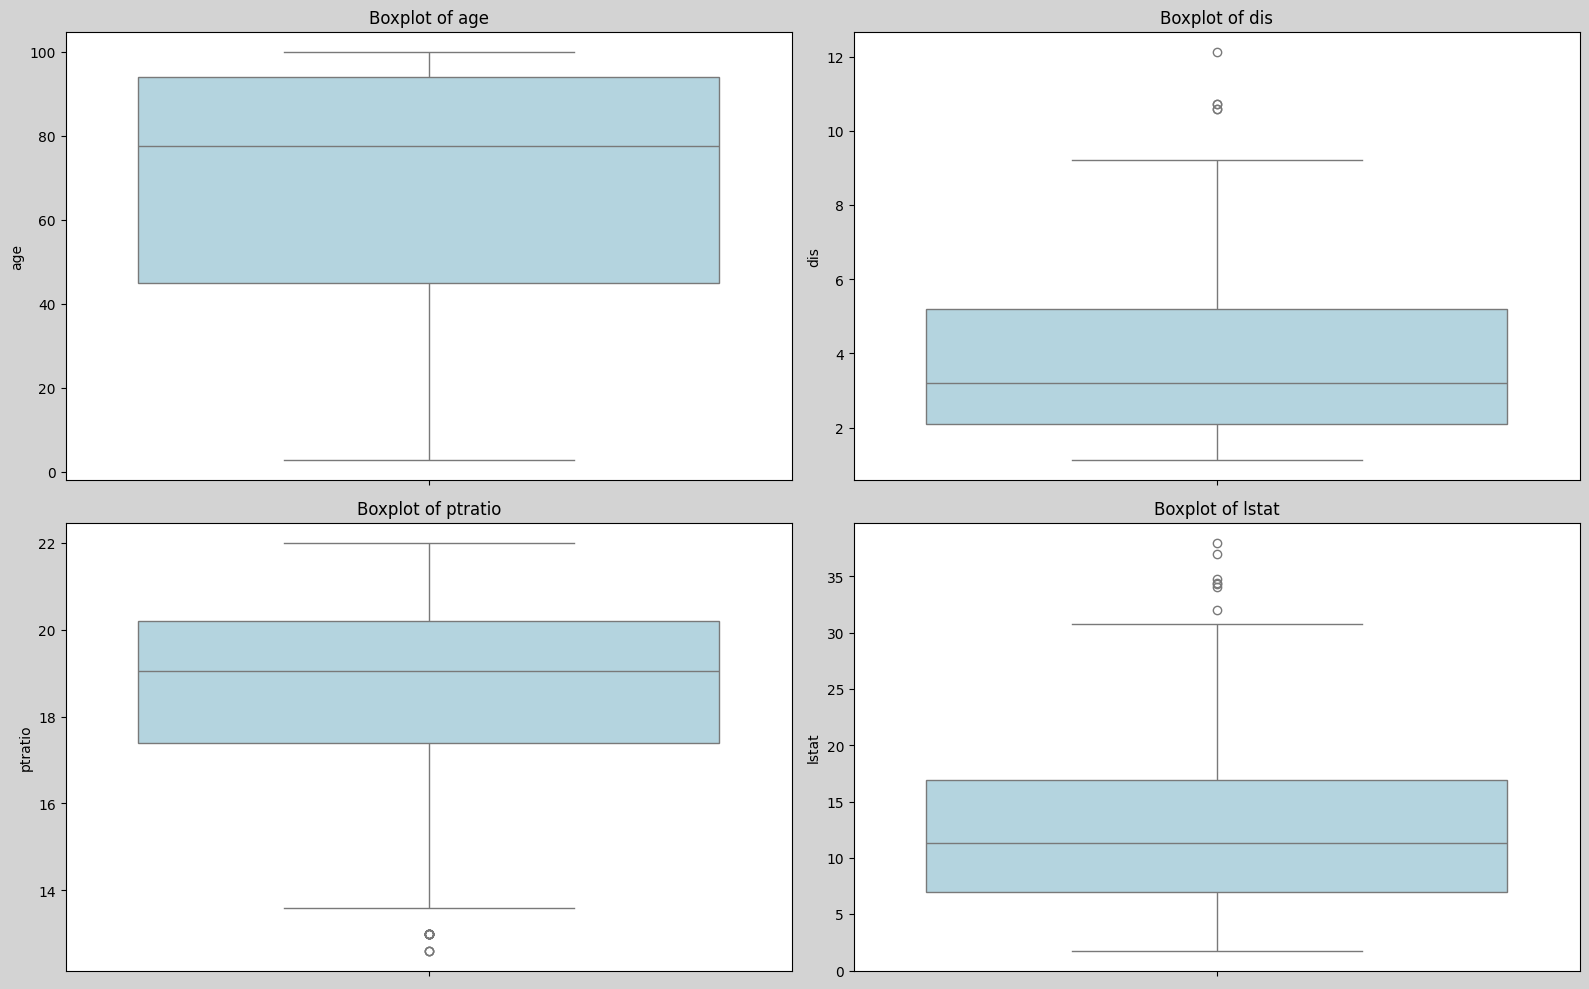

In [225]:
# To see the outliers visually
plt.figure(figsize=(16,10), facecolor='lightgray')
plt.subplot(2, 2, 1)
sns.boxplot(skewed_dataset['age'], color='lightblue')
plt.title('Boxplot of age')

plt.subplot(2, 2, 2)
sns.boxplot(skewed_dataset['dis'], color='lightblue')
plt.title('Boxplot of dis')

plt.subplot(2, 2, 3)
sns.boxplot(skewed_dataset['ptratio'], color='lightblue')
plt.title('Boxplot of ptratio')

plt.subplot(2, 2, 4)
sns.boxplot(skewed_dataset['lstat'], color='lightblue')
plt.title('Boxplot of lstat')


plt.tight_layout()
plt.show()

-> So from both graphically and by data, we can see that:
- <b>age</b> has no outliers.
- <b>dis</b> has outliers from the upper limit side only.
- <b>ptratio</b> has outliers from the lower limit side only.
- <b>lstat</b> has outliers from the upper limit side only.

### Handling the Outliers

#### <li>Trimming the Outliers</li>
<pre>       Dropping the rows in which outliers exists.</pre>

In [226]:
# Trimming the outliers
trimmed_skewed_dataset = skewed_dataset[~((skewed_dataset < lower_limit) | (skewed_dataset > upper_limit)).any(axis=1)]
trimmed_skewed_dataset


,age,dis,ptratio,lstat
0,65.2,4.0900,15.3,4.98
1,78.9,4.9671,17.8,9.14
2,61.1,4.9671,17.8,4.03
3,45.8,6.0622,18.7,2.94
4,54.2,6.0622,18.7,5.33
...,...,...,...,...
501,69.1,2.4786,21.0,9.67
502,76.7,2.2875,21.0,9.08
503,91.0,2.1675,21.0,5.64
504,89.3,2.3889,21.0,6.48


-> Hence, the outliers have been handled by removing them from the dataset.

### <li>Capping the Outliers</li>
<pre>   Replacing the outliers by upper and lower limit without dropping them.</pre>

In [227]:
# Capping the outliers: Replacing them by the limits
capped_skewed_dataset = skewed_dataset.copy()

for column in skewed_dataset.columns:
    capped_skewed_dataset[column] = np.where(
        skewed_dataset[column] > upper_limit[column],        # Condition 1
        upper_limit[column],                               # If condition 1 is true
        np.where(                                  # If condition 1 is false
            skewed_dataset[column] < lower_limit[column],    # Condition 2
            lower_limit[column],                           # If condition 2 is true
            skewed_dataset[column]                   # If condition 2 is false
        )
    )

In [228]:
print(capped_skewed_dataset.shape)

(506, 4)


In [229]:
capped_skewed_dataset.describe()

,age,dis,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000
mean,68.574901,3.783947,18.463834,12.612011
std,28.148861,2.069765,2.143924,7.016829
min,2.900000,1.129600,13.200000,1.730000
25%,45.025000,2.100175,17.400000,6.950000
50%,77.500000,3.207450,19.050000,11.360000
75%,94.075000,5.188425,20.200000,16.955000
max,100.000000,9.820800,22.000000,31.962500


-> The number of rows remains the same as well as the values also now in the limit (max < upperlimit) and (min > lowerlimit). 

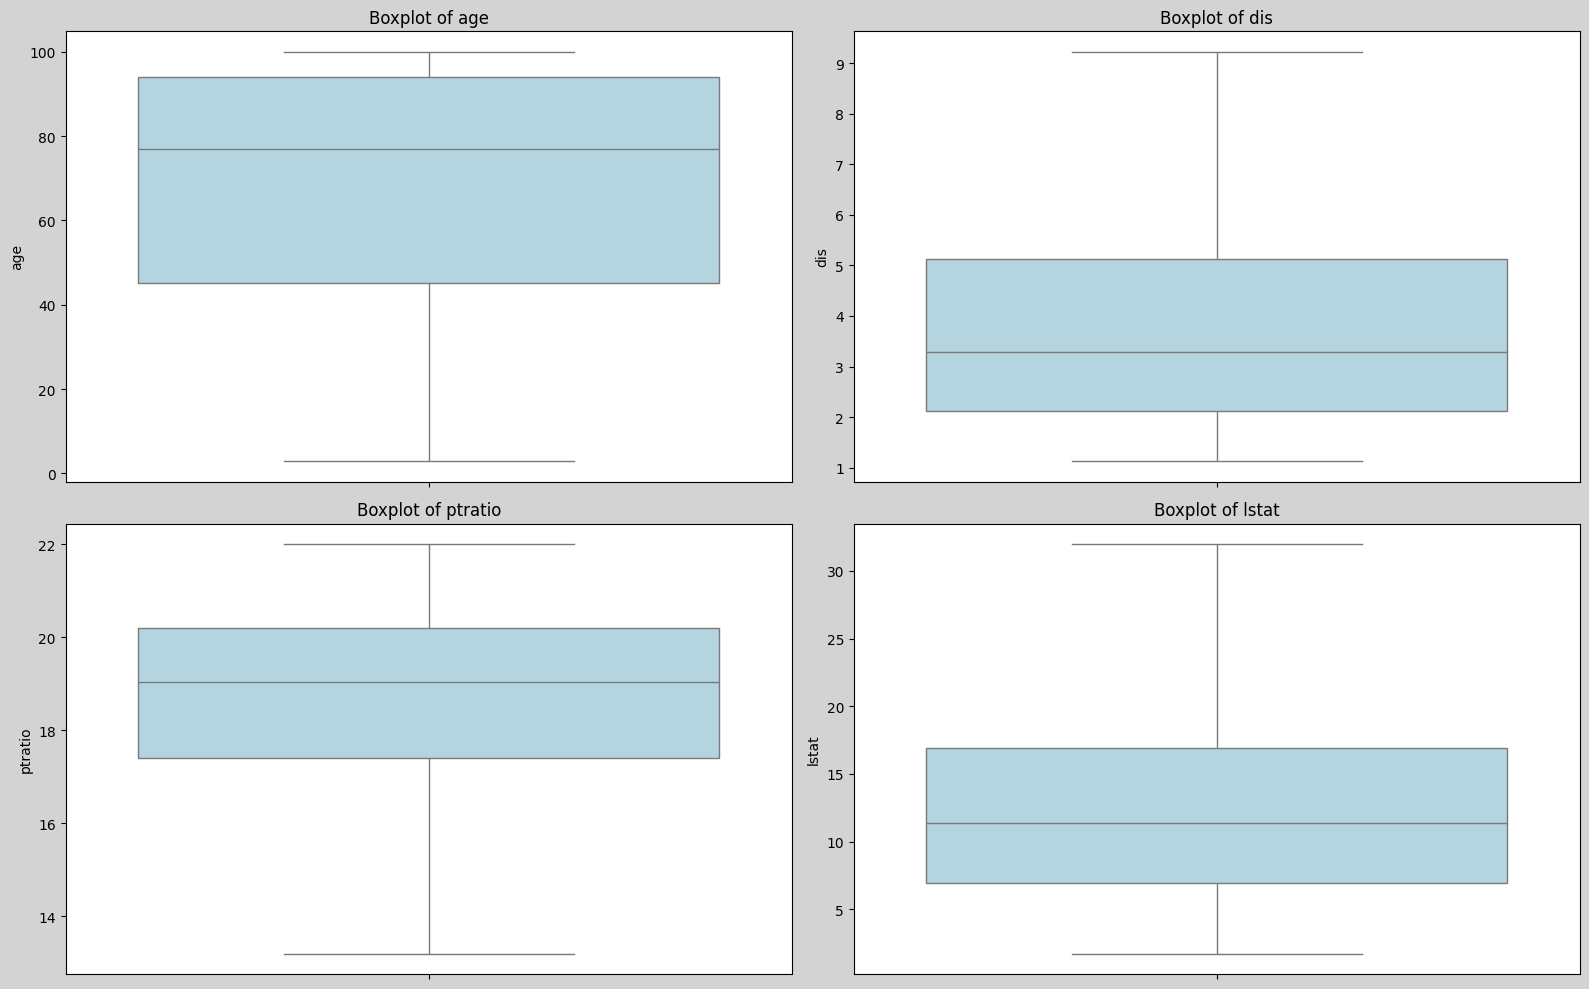

In [230]:
# Visualizing the box plots after removing outliers
# To see the outliers visually
plt.figure(figsize=(16,10), facecolor='lightgray')
plt.subplot(2, 2, 1)
sns.boxplot(trimmed_skewed_dataset['age'], color='lightblue')
plt.title('Boxplot of age')

plt.subplot(2, 2, 2)
sns.boxplot(trimmed_skewed_dataset['dis'], color='lightblue')
plt.title('Boxplot of dis')

plt.subplot(2, 2, 3)
sns.boxplot(capped_skewed_dataset['ptratio'], color='lightblue')
plt.title('Boxplot of ptratio')

plt.subplot(2, 2, 4)
sns.boxplot(capped_skewed_dataset['lstat'], color='lightblue')
plt.title('Boxplot of lstat')


plt.tight_layout()
plt.show()

-> So the outliers in the 'age', 'dis', 'ptratio' and 'lstat' features have been handled by using IQR method.

## <li>The features with Irregular Distribution</li>

In [231]:
# Creating a new dataset having only irregular distribution features.
irregularDist_dataset = boston_dataset[['crim', 'zn', 'indus', 'chas', 'nox', 'rad', 'tax', 'b']]
print(irregularDist_dataset.shape, '\n')
irregularDist_dataset.head()

(506, 8) 



,crim,zn,indus,chas,nox,rad,tax,b
0,0.00632,18.0,2.31,0,0.538,1,296,396.90
1,0.02731,0.0,7.07,0,0.469,2,242,396.90
2,0.02729,0.0,7.07,0,0.469,2,242,392.83
3,0.03237,0.0,2.18,0,0.458,3,222,394.63
4,0.06905,0.0,2.18,0,0.458,3,222,396.90


In [232]:
irregularDist_dataset.describe()

,crim,zn,indus,chas,nox,rad,tax,b
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,9.549407,408.237154,356.674032
std,8.601545,23.322453,6.860353,0.253994,0.115878,8.707259,168.537116,91.294864
min,0.006320,0.000000,0.460000,0.000000,0.385000,1.000000,187.000000,0.320000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,4.000000,279.000000,375.377500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,5.000000,330.000000,391.440000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,24.000000,666.000000,396.225000
max,88.976200,100.000000,27.740000,1.000000,0.871000,24.000000,711.000000,396.900000


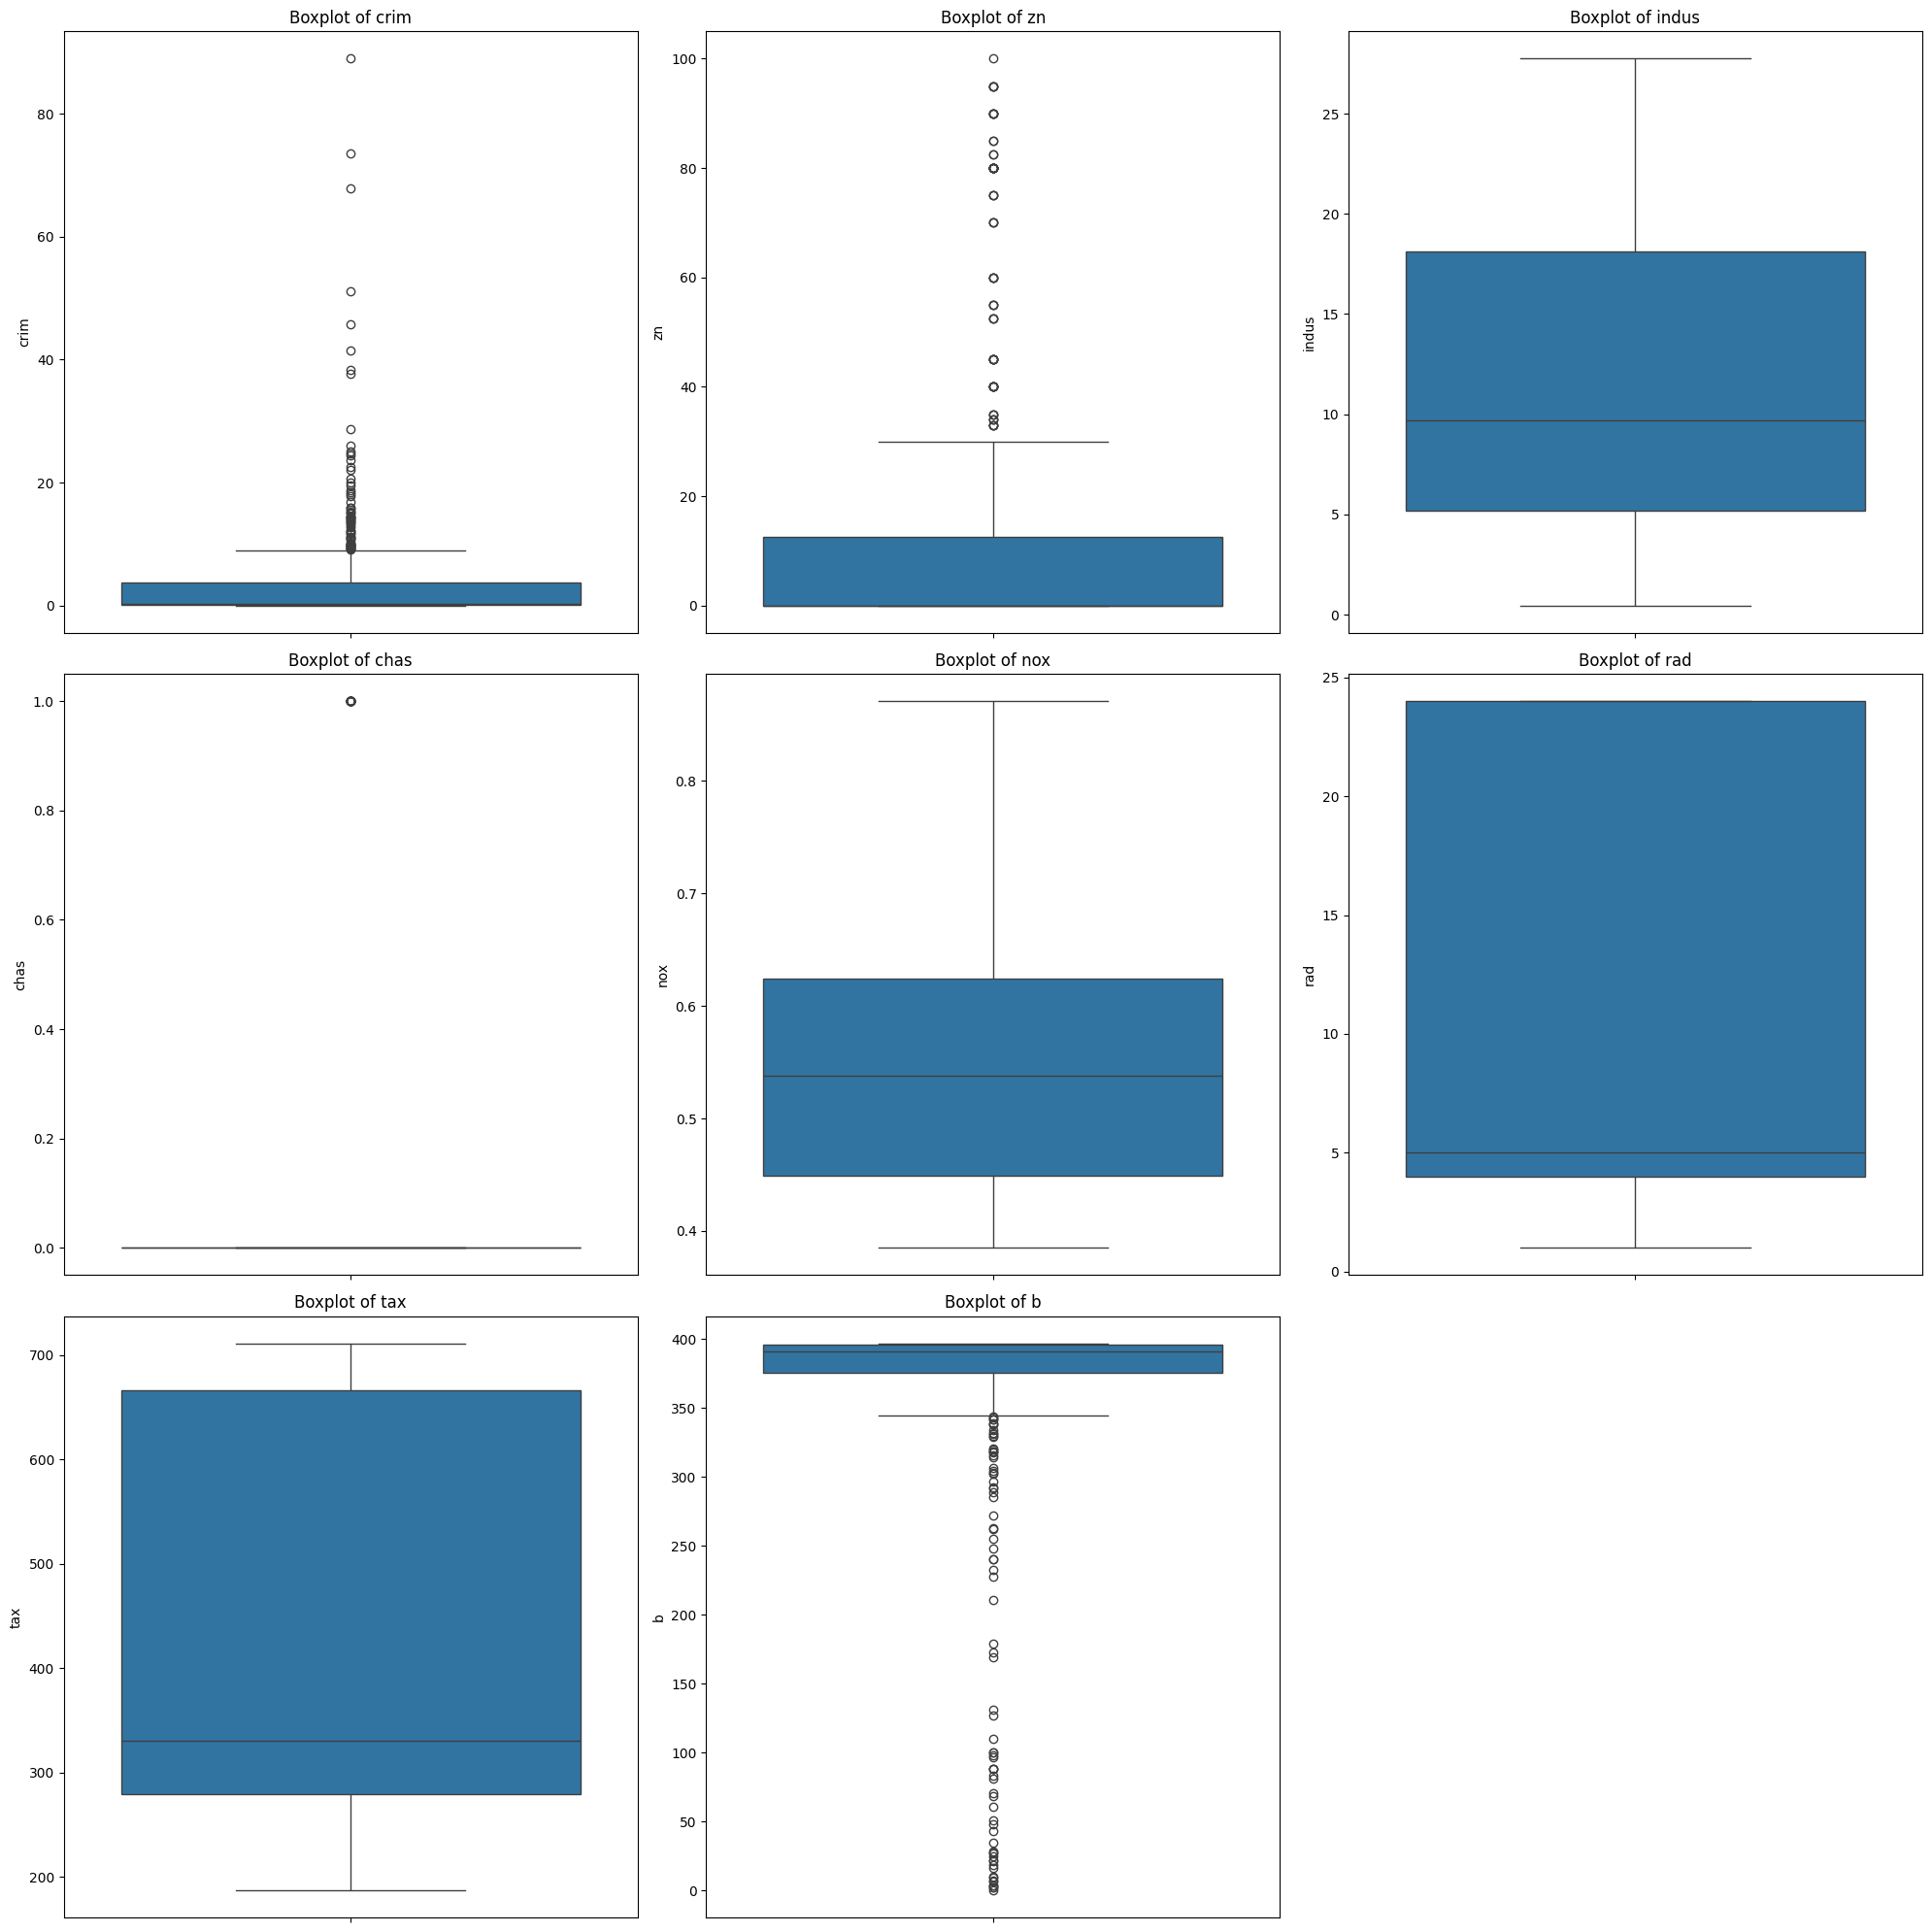

In [233]:
# Plotting the box plot to visualize the outliers
# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(irregularDist_dataset.columns):
    sns.boxplot(irregularDist_dataset[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

-> By viewing the plot, we can see that the outliers are only on one side of the box plot, not on both sides. Therefore, IQR method will be more suitable than Percentiles/Winsorization method.

In [234]:
# We'll handle the outliers of these features one by one. First finding the Q1, Q3, IQR, upper and lower limit for the skewed dataset.
Q1 = irregularDist_dataset.quantile(0.25)
Q3 = irregularDist_dataset.quantile(0.75)

# Finding the inter quartile range
IQR = Q3 - Q1
print('IQR:', IQR, '\n')

# Finding the upper and lower limits
upper_limit = Q3 + 1.5*IQR
print('Upper Limit:', upper_limit, '\n')

lower_limit = Q1 - 1.5*IQR
print('Lower Limit:', lower_limit)


IQR: crim       3.595038
zn        12.500000
indus     12.910000
chas       0.000000
nox        0.175000
rad       20.000000
tax      387.000000
b         20.847500
dtype: float64 

Upper Limit: crim        9.069639
zn         31.250000
indus      37.465000
chas        0.000000
nox         0.886500
rad        54.000000
tax      1246.500000
b         427.496250
dtype: float64 

Lower Limit: crim      -5.310511
zn       -18.750000
indus    -14.175000
chas       0.000000
nox        0.186500
rad      -26.000000
tax     -301.500000
b        344.106250
dtype: float64


In [235]:
# Identifying outliers for each column and storing them in a dictionary
outliers_dict = {}
for column in irregularDist_dataset.columns:
    outliers = irregularDist_dataset[(irregularDist_dataset[column] > upper_limit[column]) | (irregularDist_dataset[column] < lower_limit[column])]
    outliers_dict[column] = outliers.shape[0]   # Storing only the count of outliers
    if outliers.empty:
        outliers_dict[column] = 'NaN'

# Printing the outliers count for each column where outliers exist
for column, count in outliers_dict.items():
    print(f"Count of outliers in {column}: {count}")

Count of outliers in crim: 66
Count of outliers in zn: 68
Count of outliers in indus: NaN
Count of outliers in chas: 35
Count of outliers in nox: NaN
Count of outliers in rad: NaN
Count of outliers in tax: NaN
Count of outliers in b: 77


### Handling the Outliers
-> Since the number of outliers in the dataset is huge, we trimming them will make the data thin. So else, capping the outliers.

### <li>Capping the Outliers</li>
<pre>   Replacing the outliers by upper and lower limit without dropping them.</pre>

In [236]:
# Capping the outliers
irregularDist_capped_dataset = irregularDist_dataset.copy()

for column in irregularDist_dataset.columns:
    irregularDist_capped_dataset[column] = np.where(
        irregularDist_dataset[column] > upper_limit[column],        # Condition 1
        upper_limit[column],                               # If condition 1 is true
        np.where(                                  # If condition 1 is false
            irregularDist_dataset[column] < lower_limit[column],    # Condition 2
            lower_limit[column],                           # If condition 2 is true
            irregularDist_dataset[column]                   # If condition 2 is false
        )
    )

In [237]:
irregularDist_capped_dataset.shape

(506, 8)

In [238]:
irregularDist_capped_dataset.describe()

,crim,zn,indus,chas,nox,rad,tax,b
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000
mean,2.225032,6.963439,11.136779,0.0,0.554695,9.549407,408.237154,381.918836
std,3.313353,12.028788,6.860353,0.0,0.115878,8.707259,168.537116,19.054913
min,0.006320,0.000000,0.460000,0.0,0.385000,1.000000,187.000000,344.106250
25%,0.082045,0.000000,5.190000,0.0,0.449000,4.000000,279.000000,375.377500
50%,0.256510,0.000000,9.690000,0.0,0.538000,5.000000,330.000000,391.440000
75%,3.677083,12.500000,18.100000,0.0,0.624000,24.000000,666.000000,396.225000
max,9.069639,31.250000,27.740000,0.0,0.871000,24.000000,711.000000,396.900000


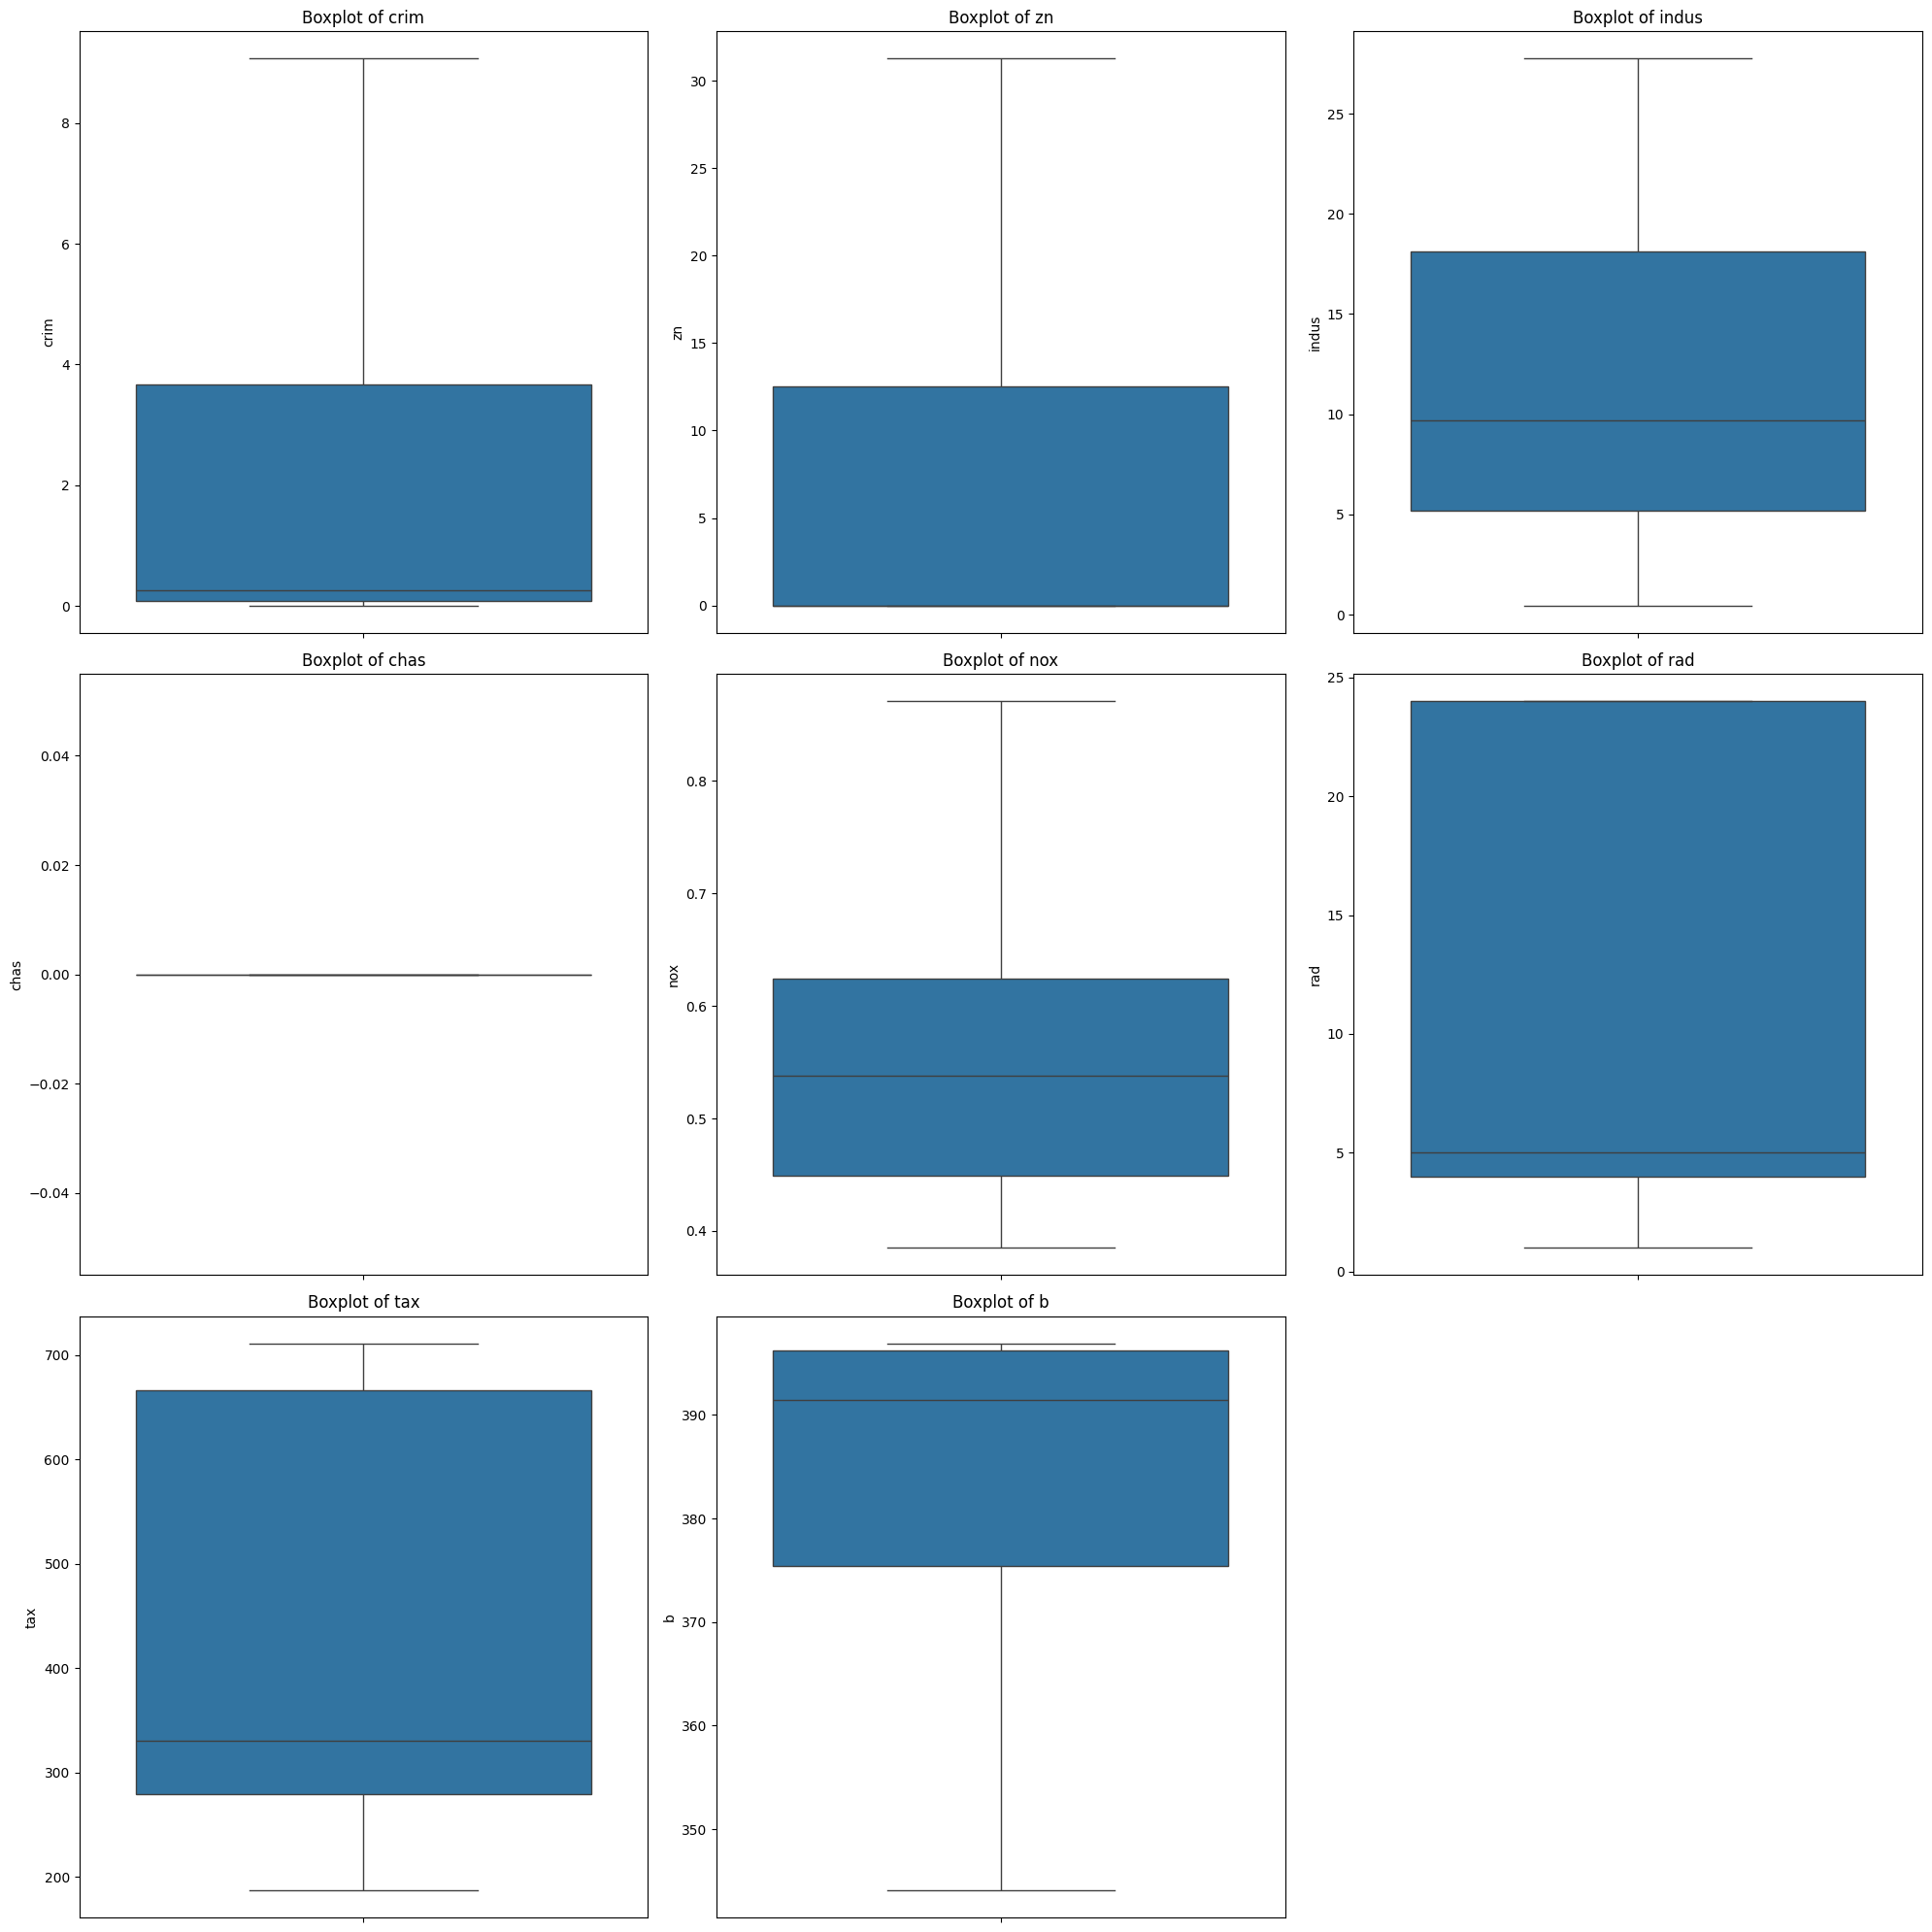

In [239]:
# Plotting the box plot to visualize the outliers
# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot (other than 'medv')
for i, feature in enumerate(irregularDist_capped_dataset.columns):
    sns.boxplot(irregularDist_capped_dataset[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<p>Hence, these are the methods by which outliers can be identified and handled.</p>

<hr>